In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [119]:
# read in the dataset
df = pd.read_csv('online_shoppers_intention.csv')

In [120]:
# 1. Perform exploratory data analysis and data pre-processing
# a. Handle missing values by dropping them (alternative: impute missing values)
df = df.dropna()
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                      'SpecialDay', 'Weekend']

# Convert 'Weekend' to int and 'Revenue' to binary values
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].apply(lambda x: 1 if x else 0)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features)

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

from sklearn.preprocessing import RobustScaler
from sklearn.covariance import EllipticEnvelope

# Scale the numerical features using RobustScaler
scaler = RobustScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Fit an elliptic envelope to the data and identify outliers
envelope = EllipticEnvelope(contamination=0.01)
envelope.fit(df[numerical_features])
outliers = envelope.predict(df[numerical_features]) == -1

# # Remove outliers from the dataframe
df = df[~outliers]

# Separate features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

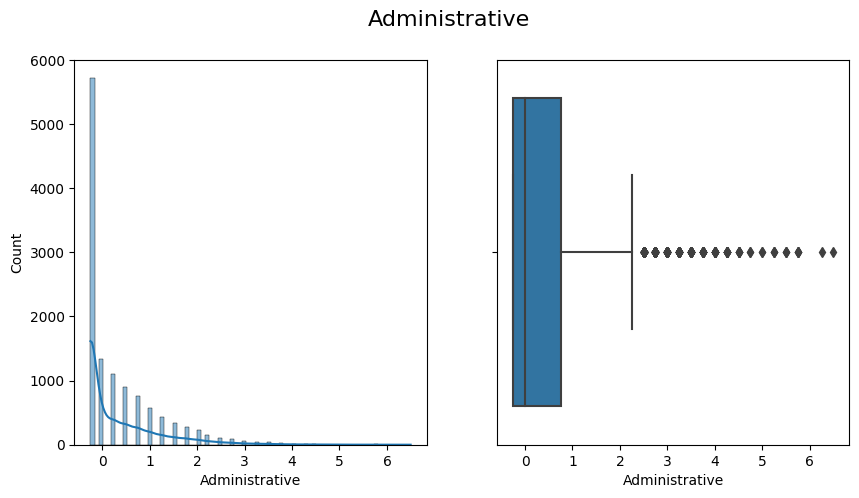

Outliers for Administrative:
       Administrative  Administrative_Duration  Informational  \
62               2.75                 2.915801       0.000000   
248              3.75                 1.588433       0.000000   
282              3.00                13.321461       3.149346   
288              2.50                 2.230669       0.787337   
478              3.00                 3.307732       0.787337   
...               ...                      ...            ...   
12209            2.75                 2.683466       0.000000   
12221            2.75                 3.325549       1.574673   
12233            3.00                 4.206152       2.362010   
12236            2.75                 2.270886       3.149346   
12244            4.50                 7.846068       0.787337   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
62                   0.000000        0.774194                 0.745806   
248                  0.000000        0.451

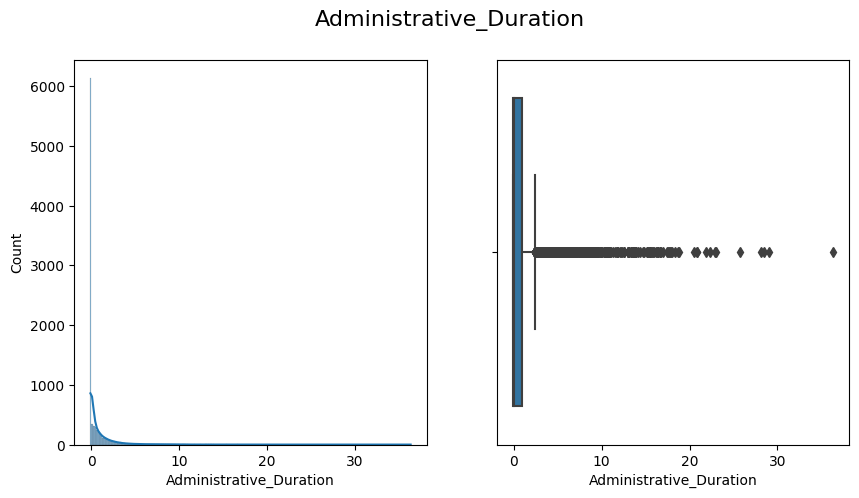

Outliers for Administrative_Duration:
       Administrative  Administrative_Duration  Informational  \
62               2.75                 2.915801       0.000000   
76               2.25                10.703483       0.000000   
109              1.25                 3.418001       3.149346   
128              0.75                 4.873668       0.000000   
187              2.25                 3.069802       1.574673   
...               ...                      ...            ...   
12244            4.50                 7.846068       0.787337   
12260            0.25                 2.736188       2.362010   
12265            1.25                 4.353591       0.000000   
12285            1.25                 3.879990       1.574673   
12307            0.25                 3.191475       2.362010   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
62                   0.000000        0.774194                 0.745806   
76                   0.000000    

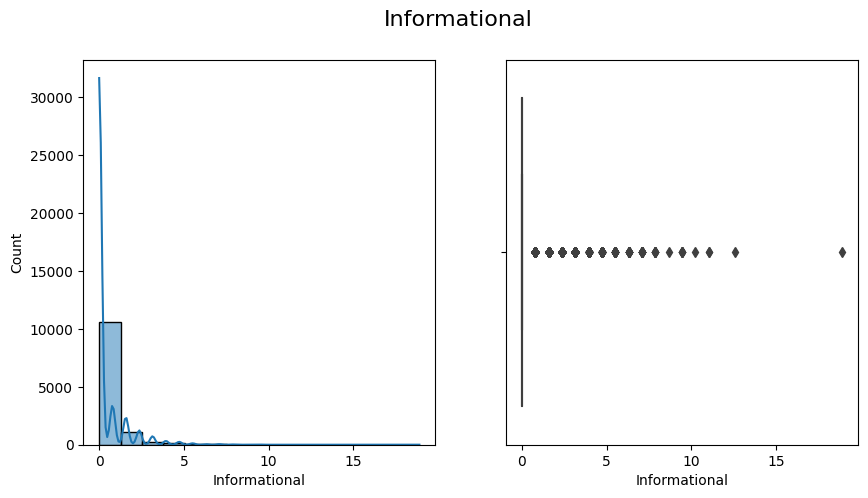

Outliers for Informational:
       Administrative  Administrative_Duration  Informational  \
29               0.00                -0.016085       0.787337   
57               0.75                 0.520072       1.574673   
98              -0.25                -0.080424       0.787337   
103              0.25                 0.251994       0.787337   
106             -0.25                -0.080424       0.787337   
...               ...                      ...            ...   
12307            0.25                 3.191475       2.362010   
12311            0.00                -0.080424       1.574673   
12312            1.50                 1.531877       0.787337   
12313            0.50                 0.091147       2.362010   
12324           -0.25                -0.080424       0.787337   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
29                   0.000000        0.870968                 0.768592   
57                   0.852614        0.5806

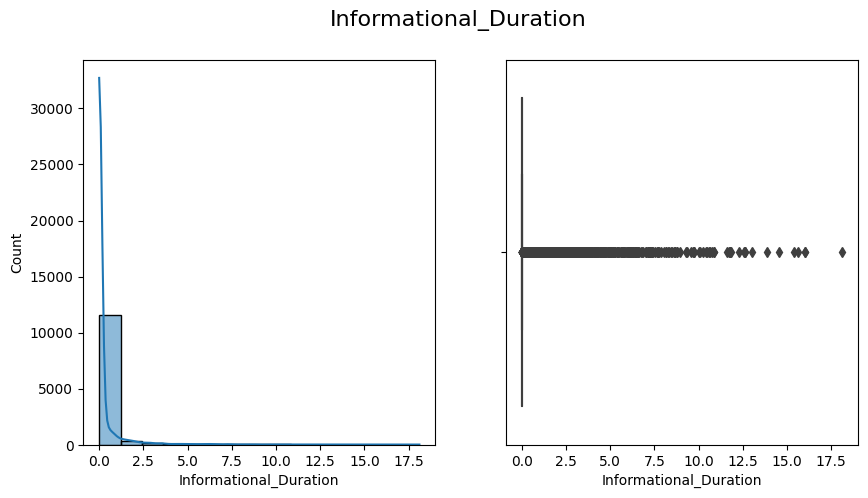

Outliers for Informational_Duration:
       Administrative  Administrative_Duration  Informational  \
57               0.75                 0.520072       1.574673   
103              0.25                 0.251994       0.787337   
109              1.25                 3.418001       3.149346   
114             -0.25                -0.080424       0.787337   
122             -0.25                -0.080424       1.574673   
...               ...                      ...            ...   
12295           -0.25                -0.080424       2.362010   
12307            0.25                 3.191475       2.362010   
12311            0.00                -0.080424       1.574673   
12312            1.50                 1.531877       0.787337   
12313            0.50                 0.091147       2.362010   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
57                   0.852614        0.580645                 0.312343   
103                  0.113682     

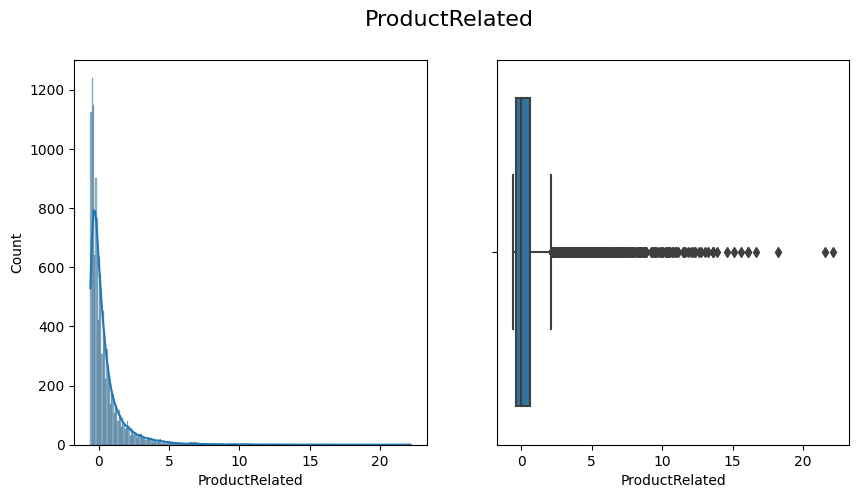

Outliers for ProductRelated:
       Administrative  Administrative_Duration  Informational  \
66               0.75                 0.391395       0.000000   
109              1.25                 3.418001       3.149346   
187              2.25                 3.069802       1.574673   
195             -0.25                -0.080424       0.000000   
288              2.50                 2.230669       0.787337   
...               ...                      ...            ...   
12285            1.25                 3.879990       1.574673   
12287            1.75                 1.720107       4.724019   
12311            0.00                -0.080424       1.574673   
12312            1.50                 1.531877       0.787337   
12317            0.50                 0.997252       0.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
66                   0.000000        2.322581                 4.963232   
109                  0.667881        3.548

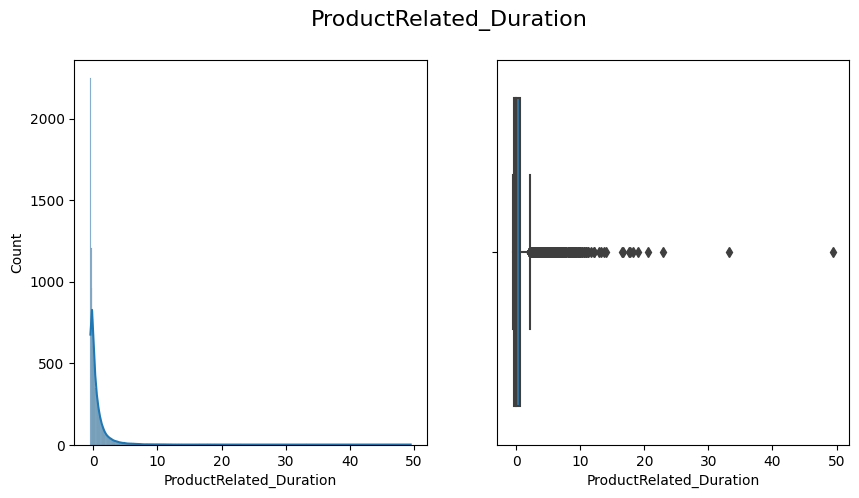

Outliers for ProductRelated_Duration:
       Administrative  Administrative_Duration  Informational  \
40               0.00                 0.016085       0.000000   
66               0.75                 0.391395       0.000000   
109              1.25                 3.418001       3.149346   
195             -0.25                -0.080424       0.000000   
251             -0.25                -0.080424       0.000000   
...               ...                      ...            ...   
12285            1.25                 3.879990       1.574673   
12287            1.75                 1.720107       4.724019   
12308            0.00                 0.123316       0.000000   
12311            0.00                -0.080424       1.574673   
12312            1.50                 1.531877       0.787337   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
40                   0.000000        0.903226                 2.722971   
66                   0.000000    

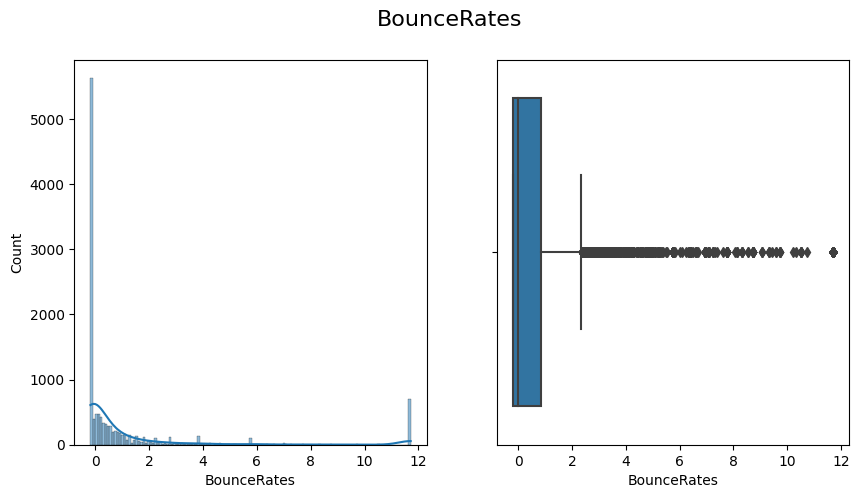

Outliers for BounceRates:
       Administrative  Administrative_Duration  Informational  \
0               -0.25                -0.080424            0.0   
2               -0.25                -0.080424            0.0   
3               -0.25                -0.080424            0.0   
6               -0.25                -0.080424            0.0   
7                0.00                -0.080424            0.0   
...               ...                      ...            ...   
12290           -0.25                -0.080424            0.0   
12292           -0.25                -0.080424            0.0   
12301           -0.25                -0.080424            0.0   
12321           -0.25                -0.080424            0.0   
12327           -0.25                -0.080424            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0       -0.548387                -0.467912   
2                         0.0       -0.548387

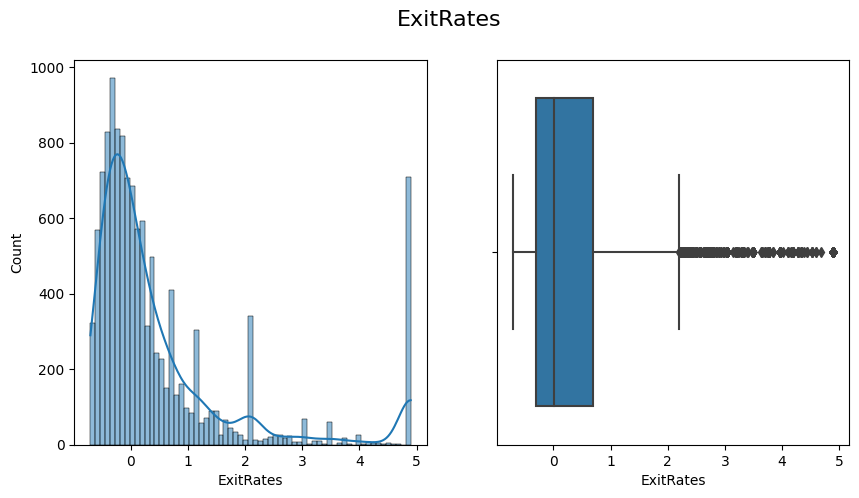

Outliers for ExitRates:
       Administrative  Administrative_Duration  Informational  \
0               -0.25                -0.080424            0.0   
2               -0.25                -0.080424            0.0   
3               -0.25                -0.080424            0.0   
6               -0.25                -0.080424            0.0   
7                0.00                -0.080424            0.0   
...               ...                      ...            ...   
12220           -0.25                -0.080424            0.0   
12248           -0.25                -0.080424            0.0   
12290           -0.25                -0.080424            0.0   
12301           -0.25                -0.080424            0.0   
12321           -0.25                -0.080424            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0       -0.548387                -0.467912   
2                         0.0       -0.548387  

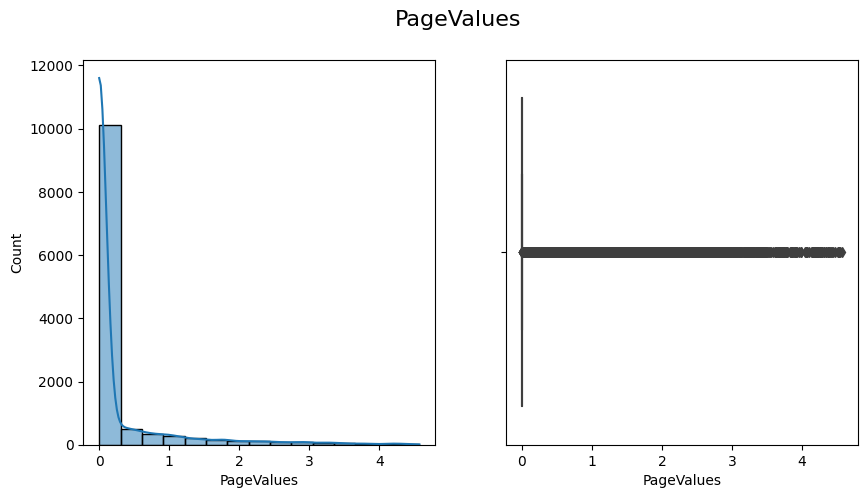

Outliers for PageValues:
       Administrative  Administrative_Duration  Informational  \
29               0.00                -0.016085       0.787337   
57               0.75                 0.520072       1.574673   
62               2.75                 2.915801       0.000000   
65               0.50                 0.861426       0.000000   
76               2.25                10.703483       0.000000   
...               ...                      ...            ...   
12307            0.25                 3.191475       2.362010   
12312            1.50                 1.531877       0.787337   
12313            0.50                 0.091147       2.362010   
12319           -0.25                -0.080424       0.000000   
12325            0.50                 1.474432       0.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
29                   0.000000        0.870968                 0.768592   
57                   0.852614        0.580645 

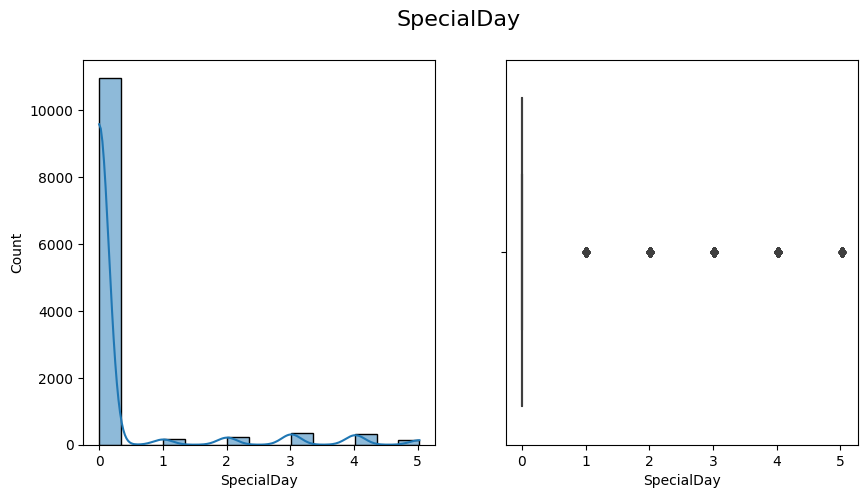

Outliers for SpecialDay:
      Administrative  Administrative_Duration  Informational  \
6              -0.25                -0.080424       0.000000   
8              -0.25                -0.080424       0.000000   
9              -0.25                -0.080424       0.000000   
11             -0.25                -0.080424       0.000000   
20             -0.25                -0.080424       0.000000   
...              ...                      ...            ...   
5439            0.00                 1.522686       0.000000   
5448            0.50                 0.300248       0.000000   
5450            0.25                 0.369948       0.000000   
5453            0.25                 0.734535       0.787337   
5454           -0.25                -0.080424       0.000000   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
6                   0.000000       -0.548387                -0.467912   
8                   0.000000       -0.516129                

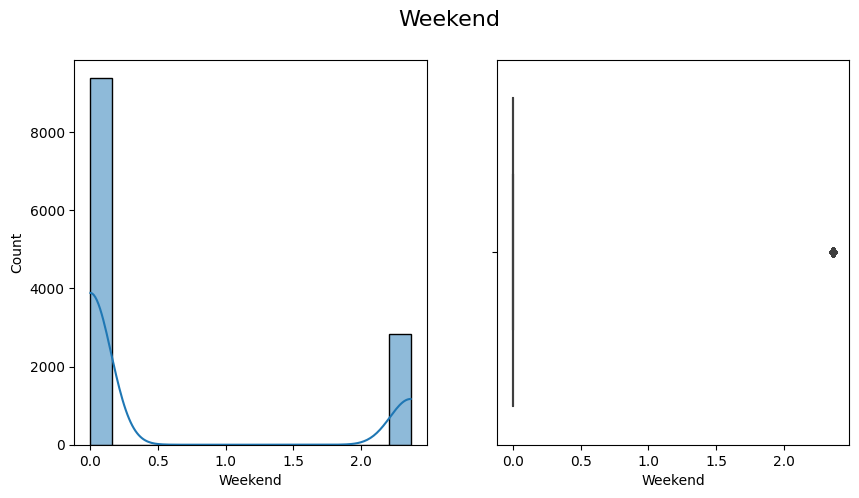

Outliers for Weekend:
       Administrative  Administrative_Duration  Informational  \
4               -0.25                -0.080424            0.0   
7                0.00                -0.080424            0.0   
17              -0.25                -0.080424            0.0   
20              -0.25                -0.080424            0.0   
24              -0.25                -0.080424            0.0   
...               ...                      ...            ...   
12318           -0.25                -0.080424            0.0   
12325            0.50                 1.474432            0.0   
12326           -0.25                -0.080424            0.0   
12327           -0.25                -0.080424            0.0   
12329           -0.25                -0.080424            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
4                         0.0       -0.258065                 0.022315   
7                         0.0       -0.580645    

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# b. Plot the histogram of the features and boxplot for outlier detection
for feature in numerical_features:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # Plot histogram with kernel density estimate
    sns.histplot(data=df, x=feature, kde=True, ax=ax[0])
    # Plot boxplot for outlier detection
    sns.boxplot(data=df, x=feature, ax=ax[1])
    fig.suptitle(feature, fontsize=16)
    plt.show()

# Identify the outliers based on the boxplot visualization
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"Outliers for {feature}:\n{outliers}\n")

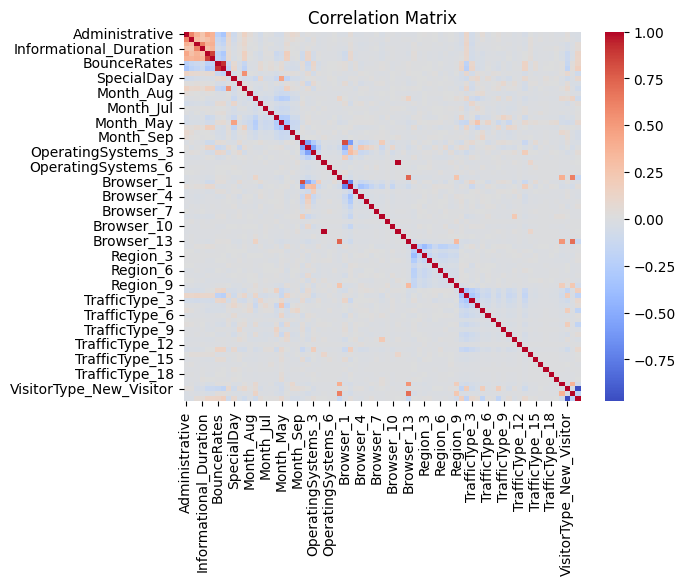

In [122]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

PageValues                 0.351308
ExitRates                  0.081851
Administrative             0.065555
ProductRelated_Duration    0.063587
ProductRelated             0.059558
Administrative_Duration    0.052182
BounceRates                0.039882
Informational              0.020390
Informational_Duration     0.016619
TrafficType_3              0.016149
dtype: float64


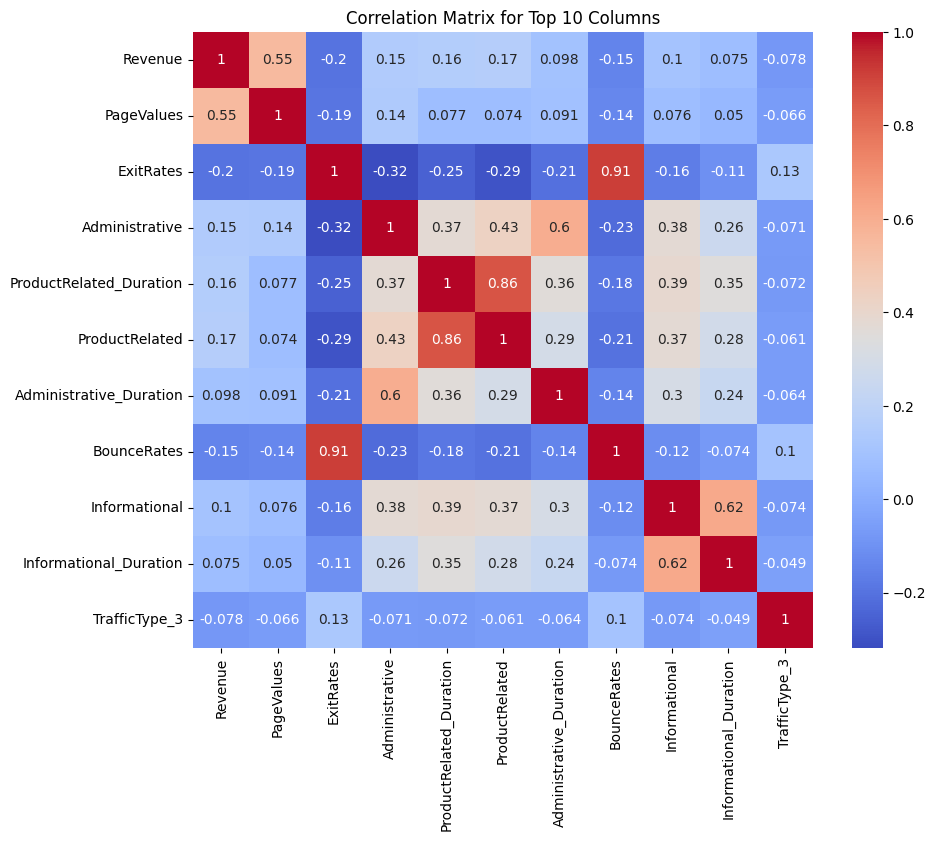

                          Revenue  PageValues  ExitRates  Administrative  \
Revenue                  1.000000    0.547794  -0.199616        0.147570   
PageValues               0.547794    1.000000  -0.194724        0.142953   
ExitRates               -0.199616   -0.194724   1.000000       -0.318710   
Administrative           0.147570    0.142953  -0.318710        1.000000   
ProductRelated_Duration  0.157959    0.076619  -0.252378        0.374381   
ProductRelated           0.165225    0.073516  -0.293116        0.430052   
Administrative_Duration  0.097842    0.090665  -0.206933        0.601262   
BounceRates             -0.145708   -0.135102   0.913170       -0.225057   
Informational            0.102339    0.075715  -0.164604        0.375995   
Informational_Duration   0.074724    0.050199  -0.105725        0.255845   
TrafficType_3           -0.078320   -0.065849   0.128032       -0.071313   

                         ProductRelated_Duration  ProductRelated  \
Revenue            

In [123]:
# d. Determine the top 10 most important features using Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
top_10_features = feat_importances.nlargest(10)
print(top_10_features)

# # Assuming you have already calculated the top_10_features using the RandomForest classifier
top_10_columns = top_10_features.index.tolist()

# # # Select the top 10 columns and the target variable 'Revenue' from the DataFrame
selected_columns = ['Revenue'] + top_10_columns
df_selected = df[selected_columns]

# Compute the correlation matrix
corr_selected = df_selected.corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_selected, cmap='coolwarm', annot=True, ax=ax)
plt.title("Correlation Matrix for Top 10 Columns")
plt.show()

# Compute the correlation matrix
corr_selected = df_selected.corr()

# Create a dataframe from the correlation matrix
corr_df = pd.DataFrame(corr_selected)

# Display the correlation dataframe
print(corr_df)

This is a correlation matrix showing the correlation coefficients between pairs of variables in the dataset. The values range from -1 to 1, where a value of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

From this particular matrix, we can see that PageValues has a moderate positive correlation with Revenue (0.49), while ExitRates has a moderate negative correlation with Revenue (-0.21). This suggests that users who spend more time on pages with higher PageValues are more likely to make a purchase, while users who quickly exit pages with higher ExitRates are less likely to make a purchase.

We can also see that there is a strong positive correlation between ProductRelated_Duration and ProductRelated (0.86), suggesting that users who spend more time on Product-related pages tend to view more Product-related pages. There is also a moderate positive correlation between Administrative and ProductRelated (0.43), indicating that users who view more Administrative pages tend to view more Product-related pages.

In [124]:
# 2. Perform Principal Component Analysis (PCA) to reduce feature dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [125]:
from sklearn.model_selection import cross_val_score
# 3. Design and implement machine learning algorithms to predict customer behavior
classifiers = [
    (KNeighborsClassifier(), "K-Nearest Neighbor"),
    (GaussianNB(), "Naïve Bayes"),
    (LogisticRegression(random_state=42, max_iter=10000), "Logistic Regression"),
    (SVC(random_state=42, probability=True), "Support Vector Machine"),
    (RandomForestClassifier(random_state=42), "Random Forest")
]

What we found out:

When you perform PCA, you are reducing the dimensionality of your data by projecting it onto a new set of orthogonal axes called principal components. The number of principal components you choose to keep will affect the amount of variance in your data that is retained.

when we reduced the dimensionality of our data to two principal components using PCA. This means that each sample in your dataset is now represented by a two-dimensional vector instead of the original high-dimensional feature vector. we then split the data into training and test sets and trained a K-Nearest Neighbor (KNN) algorithm on the reduced dataset.

When we increased the number of components, we captured more variance in your data. This means that feature vectors now had more dimensions, which could potentially lead to better performance for algorithms that can exploit the increased information. In our case, the Random Forest classifier was able to take advantage of the additional dimensions and achieve better accuracy than the KNN algorithm.

It's worth noting that increasing the number of components can also increase the risk of overfitting if the additional dimensions do not actually contain useful information.


K-Nearest Neighbor accuracy: 0.8460
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2089
           1       0.40      0.14      0.20       353

    accuracy                           0.85      2442
   macro avg       0.64      0.55      0.56      2442
weighted avg       0.80      0.85      0.81      2442

K-Nearest Neighbor - 5-fold cross-validation:
Mean accuracy: 0.8687, Standard deviation: 0.0174



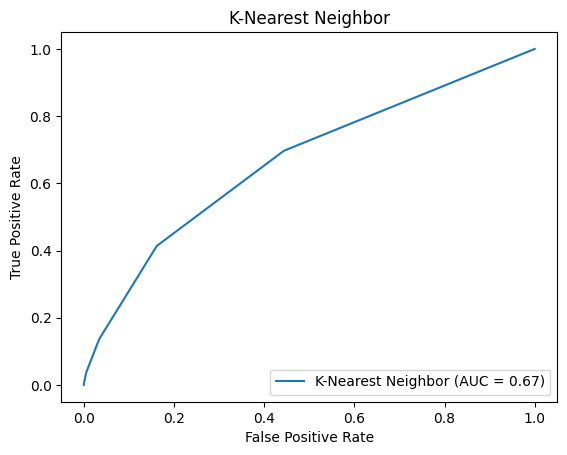

Naïve Bayes accuracy: 0.8366
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2089
           1       0.23      0.05      0.09       353

    accuracy                           0.84      2442
   macro avg       0.54      0.51      0.50      2442
weighted avg       0.77      0.84      0.79      2442

Naïve Bayes - 5-fold cross-validation:
Mean accuracy: 0.2630, Standard deviation: 0.0327



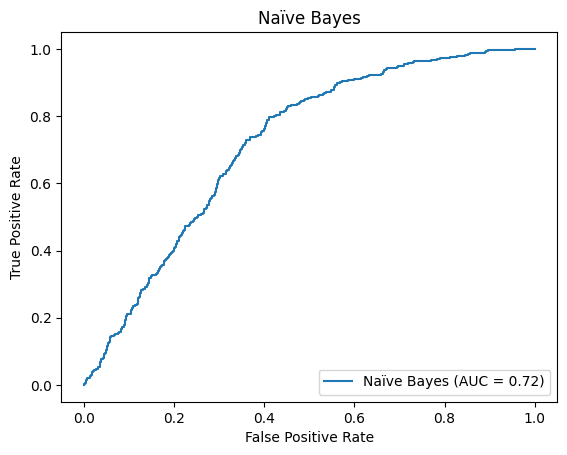

Logistic Regression accuracy: 0.8550
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2089
           1       0.44      0.01      0.02       353

    accuracy                           0.86      2442
   macro avg       0.65      0.50      0.47      2442
weighted avg       0.80      0.86      0.79      2442

Logistic Regression - 5-fold cross-validation:
Mean accuracy: 0.8851, Standard deviation: 0.0086



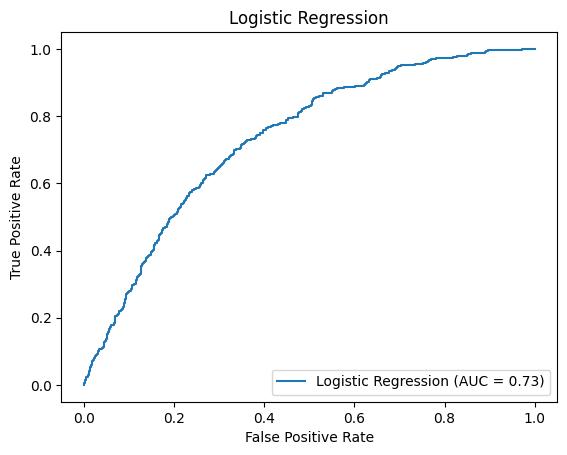

Support Vector Machine accuracy: 0.8554
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2089
           1       0.50      0.00      0.01       353

    accuracy                           0.86      2442
   macro avg       0.68      0.50      0.46      2442
weighted avg       0.80      0.86      0.79      2442

Support Vector Machine - 5-fold cross-validation:
Mean accuracy: 0.8918, Standard deviation: 0.0135



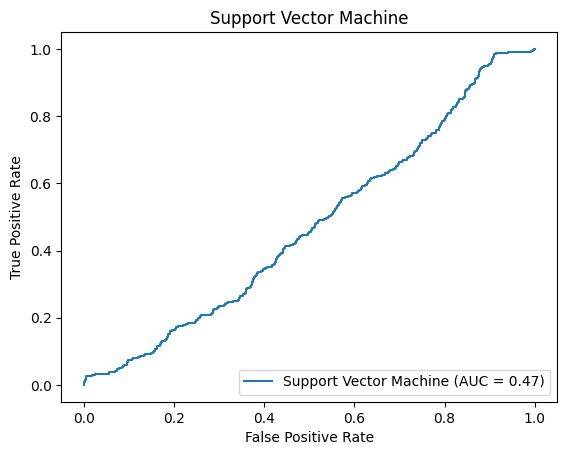

Random Forest accuracy: 0.8370
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2089
           1       0.35      0.15      0.21       353

    accuracy                           0.84      2442
   macro avg       0.61      0.55      0.56      2442
weighted avg       0.79      0.84      0.81      2442

Random Forest - 5-fold cross-validation:
Mean accuracy: 0.8955, Standard deviation: 0.0113



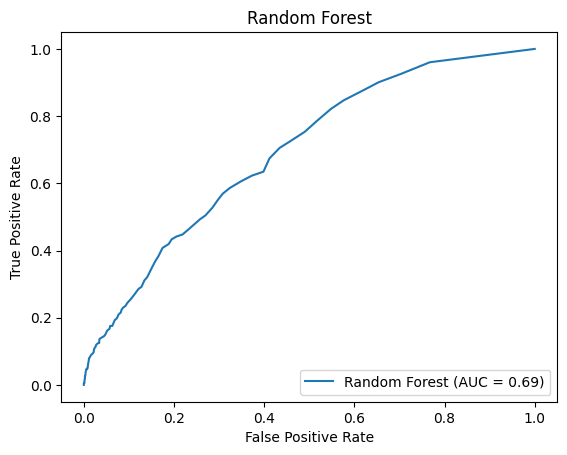

In [126]:
# a. Train and evaluate the performance of each classifier
# b. Compare the performance metrics of the classification algorithms
# c. Plot ROC graph for the algorithms
num_folds = 5
for clf, clf_name in classifiers:
    clf.fit(X_pca_train, y_train)
    cv_scores = cross_val_score(clf, X, y, cv=num_folds)
    y_pred = clf.predict(X_pca_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))
    mean_score = cv_scores.mean()
    std_score = cv_scores.std()

    # Print the results
    print(f"{clf_name} - {num_folds}-fold cross-validation:")
    print(f"Mean accuracy: {mean_score:.4f}, Standard deviation: {std_score:.4f}\n")

    y_pred_proba = clf.predict_proba(X_pca_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=clf_name)
    display.plot()
    plt.title(clf_name)
    plt.show()
    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

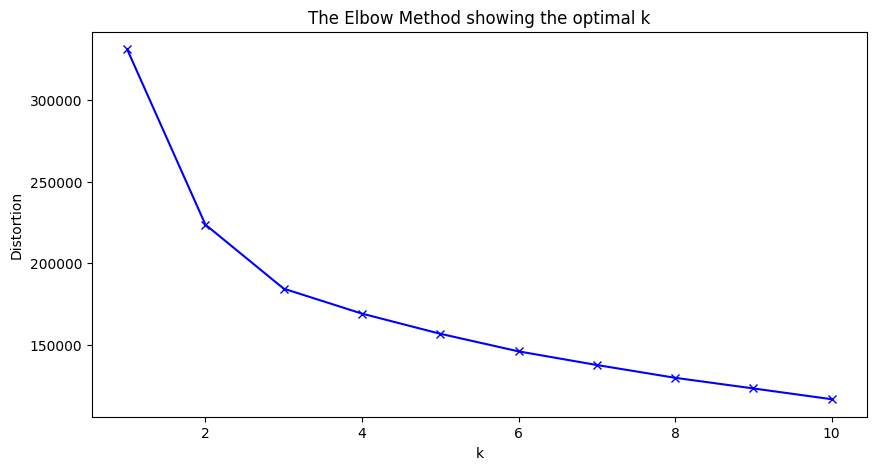

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


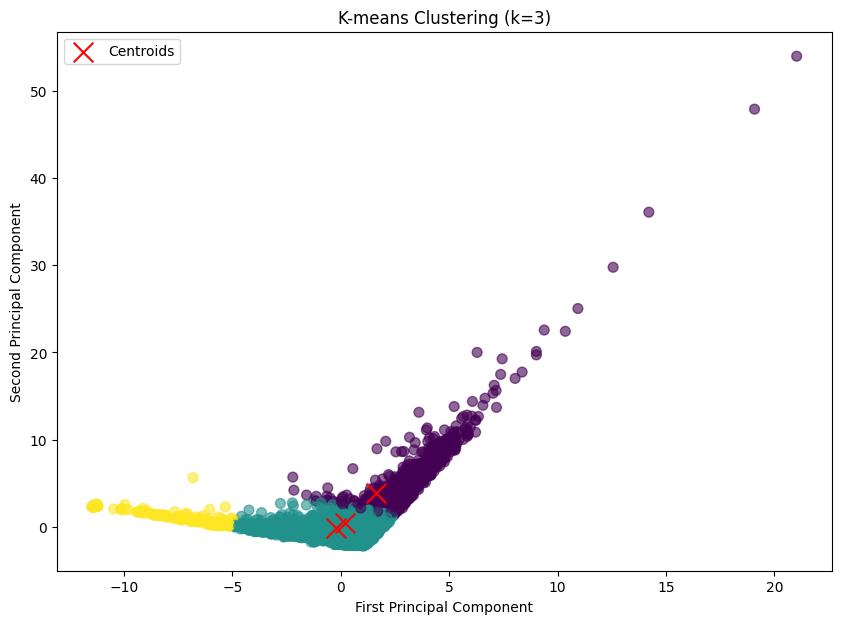

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


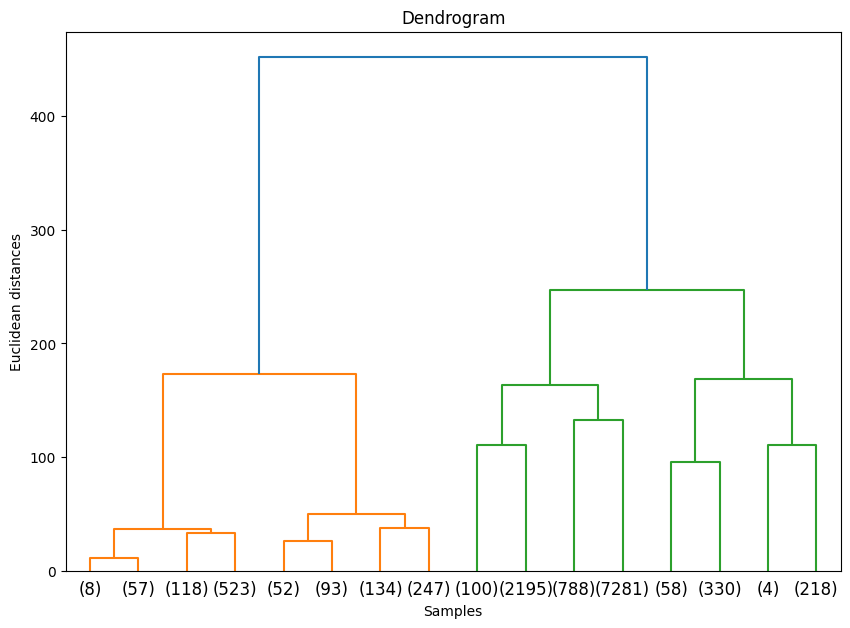

K-means silhouette score: 0.4265
Agglomerative clustering silhouette score: 0.4751
K-means classification metrics:
Accuracy: 0.1928
Precision: 0.6211
Recall: 0.1928
F1-score: 0.1741


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using the Elbow method
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Apply K-means clustering
optimal_clusters = 3  # You can change this based on the elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Plot the K-means clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (k={optimal_clusters})')
plt.legend()
plt.show()


# Perform hierarchical clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(X)

# Create a dendrogram
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=3)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Calculate silhouette scores for K-means and Agglomerative clustering
kmeans_silhouette = silhouette_score(X, kmeans_labels)
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)

print(f"K-means silhouette score: {kmeans_silhouette:.4f}")
print(f"Agglomerative clustering silhouette score: {hierarchical_silhouette:.4f}")

# Calculate classification metrics for K-means clustering
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y, kmeans_labels)
precision = precision_score(y, kmeans_labels, average='weighted')
recall = recall_score(y, kmeans_labels, average='weighted')
f1 = f1_score(y, kmeans_labels, average='weighted')

print("K-means classification metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


It's possible that removing the outliers did not have a significant impact on the performance of algorithms. We believe that There could be several reasons for this:

The outliers may not have had a strong influence on the overall distribution of your data. In such cases, removing them would not have a big impact on the model's performance.
The outliers may have been close to the decision boundary and their removal did not change the model's predictions significantly.
The number of outliers may have been too small to have a significant impact on the model's performance.
The machine learning algorithms may already be robust to outliers, or they may be using regularization techniques that make them less sensitive to outliers.


In [128]:
# 4. Suggested a few possible ways to attract more customers to finish with purchasing
suggestions = [
    "1. Improve website user experience: Make sure that the website is easy to navigate, has a good layout, and loads quickly. This can increase the time customers spend on the website and improve the chances of making a purchase.",
    "2. Personalized recommendations: Use machine learning algorithms to recommend products that are relevant to customers based on their browsing history, preferences, and other factors. Personalized recommendations can encourage customers to explore more products and make purchases.",
    "3. Offer promotions and discounts: Attract customers with special offers, discounts, or exclusive deals, especially during holidays or special events. This can incentivize customers to make purchases.",
    "4. Retargeting: Use retargeting strategies to remind customers of the products they've viewed or added to their carts but haven't purchased. This can be done through email campaigns or ads on other websites or social media platforms.",
    "5. Improve customer support: Providing excellent customer support can increase customer trust and satisfaction, leading to a higher likelihood of making a purchase."
]

for suggestion in suggestions:
    print(suggestion)

1. Improve website user experience: Make sure that the website is easy to navigate, has a good layout, and loads quickly. This can increase the time customers spend on the website and improve the chances of making a purchase.
2. Personalized recommendations: Use machine learning algorithms to recommend products that are relevant to customers based on their browsing history, preferences, and other factors. Personalized recommendations can encourage customers to explore more products and make purchases.
3. Offer promotions and discounts: Attract customers with special offers, discounts, or exclusive deals, especially during holidays or special events. This can incentivize customers to make purchases.
4. Retargeting: Use retargeting strategies to remind customers of the products they've viewed or added to their carts but haven't purchased. This can be done through email campaigns or ads on other websites or social media platforms.
5. Improve customer support: Providing excellent customer 